In [6]:
#연습문제 10-2
import numpy as np
import pandas as pd
from pandas import DataFrame

df = pd.read_csv('C:/gskim/P4DS/data/diabetes.csv')
df.info()
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())
#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

df[['Glucose','BloodPressure','SkinThickness',
    'Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
    df[['Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df.fillna(df.mean(), inplace = True)   # replace NaN with the mean

print(df.eq(0).sum())


#---features---
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

#---label---
y = df.iloc[:,4]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age               

In [38]:
from sklearn.linear_model import LinearRegression

mod = LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)

mod.fit(X, y)
print(mod.coef_)
print(mod.intercept_)

[ 1.10003962 -0.36710397  0.52346288  0.68619871  7.49727218  0.28492031]
-2.2735969499775877


In [39]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Insulin   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     29.32
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           1.15e-31
Time:                        21:15:37   Log-Likelihood:                -4421.5
No. Observations:                 768   AIC:                             8857.
Df Residuals:                     761   BIC:                             8890.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [40]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size = 0.3)

mod.fit(X_train, y_train)

y_train_pred = mod.predict(X_train)
y_test_pred = mod.predict(X_test)

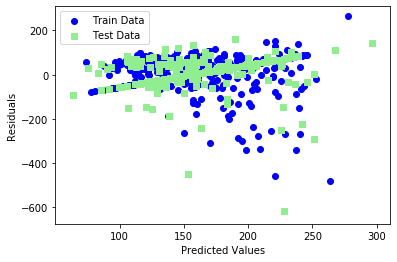

In [41]:
#import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 Train : %.3f, Test : %.3f' % (mod.score(X_train, y_train), mod.score(X_test, y_test)))

MSE Train : 5616.238, Test : 6513.906
R^2 Train : 0.203, Test : 0.144
